In [1]:
import numpy as np
from matplotlib import pyplot as plt
# importing all necessary modules
from wordcloud import WordCloud
import pickle
from PIL import Image

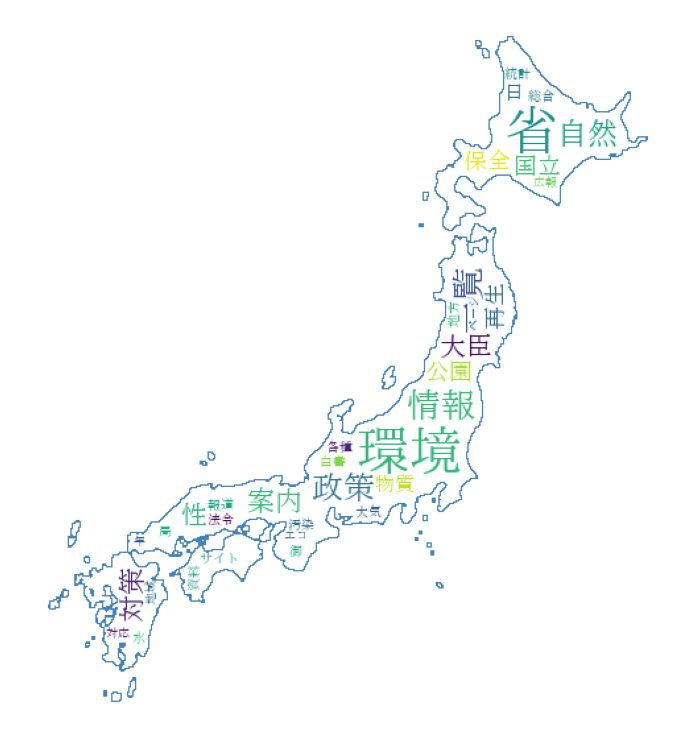

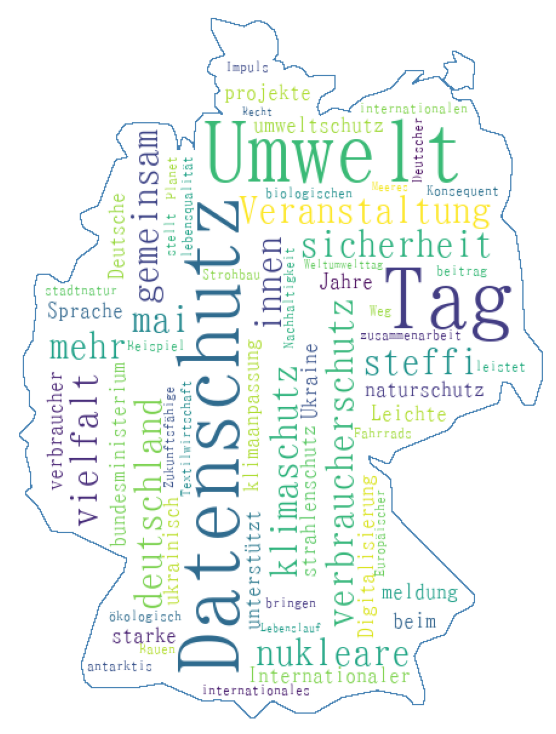

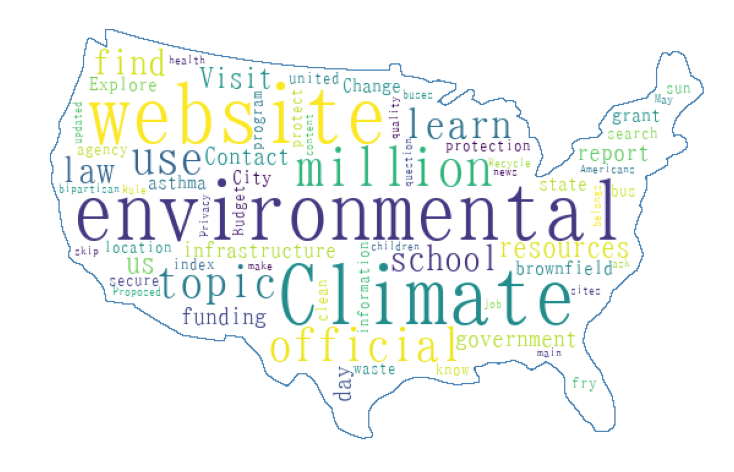

In [2]:
for LANG in ["ja","de","fr","en"]:
    
    #These lists are generated with 01_ReadWebsite.ipynb
    pickle_off = open("words_"+LANG+".txt", "rb")
    tokens = pickle.load(pickle_off)
    
    #Load image for contour of word cloud
    mask = np.array(Image.open("contour_"+LANG+".png"))
    
    comment_words = ''
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 400, height = 400,
                    background_color = 'white',
                    collocations = False,
                    font_path = "/usr/share/fonts/truetype/takao-mincho/TakaoMincho.ttf",
                    mask = mask,
                    contour_width = 1,
                    contour_color = 'steelblue',
                    relative_scaling = 0,
                    min_font_size = 9).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig("wordcloud_"+LANG+".png")
    plt.show()